<a href="https://colab.research.google.com/github/anna8murphy/land_cover_classification/blob/main/LandCoverClassifcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ! git clone https://github.com/TarunKumar1995-glitch/land_cover_classification_unet.git

In [ ]:
# #Configuration environment
# import os

# os.environ['KAGGLE_USERNAME'] = "almurph" # username from the json file
# os.environ['KAGGLE_KEY'] = "4df29035892d073e273ea76035decb88" # key from the json file

In [2]:
cd drive/MyDrive/land_classification/land_cover_classification_unet/

/content/drive/MyDrive/land_classification/land_cover_classification_unet


In [ ]:
# !kaggle datasets download -d geoap96/deepglobe2018-landcover-segmentation-traindataset --force

In [ ]:
# !unzip deepglobe2018-landcover-segmentation-traindataset.zip -d data/
## will only take a minute

## reorganize the directories
# mv data/data/* data/
# rm data/data/

In [ ]:
pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 68.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=14366d9347c7d9588e39619e22b05184ff5a2127e8d2d98d159c9fca38546810
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=53d206f75f7b66d9eb159150722c1eccdeece1de5bc29913ba2dbe80a62a19d4
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels


In [ ]:
pip install scikit-build

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.3/84.3 kB 2.7 MB/s eta 0:00:00


yellow: 2379.645852
magenta: 343.123454
cyan: 461.187501
black: 2.353255
white: 323.391391
blue: 138.399288
green: 444.916091


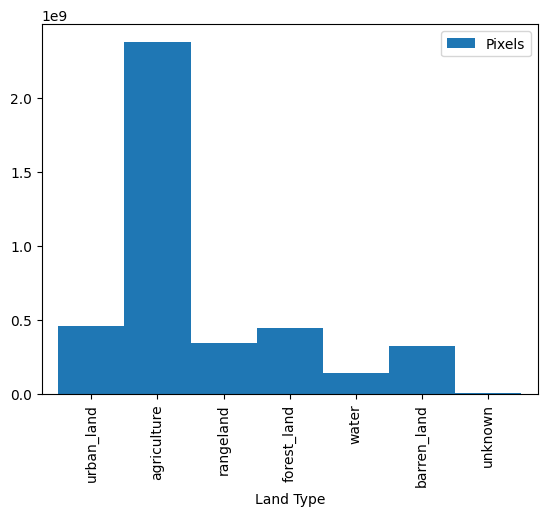

<Figure size 640x480 with 0 Axes>

In [ ]:
# %matplotlib inline
# %run distribution.py

In [17]:
# The model is trained with a batch size of 4, image scaling factor of 0.2, in half precision mode, ADAM optimizer, constant lr of 4e-5, train-valid split of 80–20 and 200 epochs.
!python3 train.py -e 200 -v 20.0 -l 1e-5 -b 4 -s 0.5

2024-03-17 18:52:09.206942: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-17 18:52:09.207053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-17 18:52:09.329986: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-17 18:52:09.580212: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-17 18:52:11.764082: W tensorflow/comp

In [12]:
%%time
# Making a prediction on the test set dataset using 200 epoch model trained on subset of data using a scale of 20%.
# !python predict.py -m checkpoints/CP_epoch200.pth -i data/test_data/images/* -o  predictions/ -s 0.2 --viz
!python predict.py -m checkpoints/CP_epoch200.pth -i data/img_subset/* -o  predictions_subset/ -s 0.2 --viz

/content/drive/MyDrive/land_classification/land_cover_classification_unet/predict.py:204: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  gt_tensor=torch.Tensor(gt_list)
IoU Value: 0.6563728253046671
---
urban land : 0.5918250679969788
agriculture : 0.8355011940002441
rangeland : 0.2529821991920471
forest_land : 0.7822927236557007
water : 0.858817994594574
barren_land : 0.6168177723884583
---
CPU times: user 64.1 ms, sys: 12.8 ms, total: 76.9 ms
Wall time: 10.4 s
